In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os


In [6]:
# Define the assets and the date range
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2025-01-31"

# Fetch the data
data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

# Save to CSV
for ticker in tickers:
    data[ticker].to_csv(f"{ticker}_historical_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Load the data
df_tsla = pd.read_csv("TSLA_historical_data.csv")
df_bnd = pd.read_csv("BND_historical_data.csv")
df_spy = pd.read_csv("SPY_historical_data.csv")

# Check for missing values
print(df_tsla.isnull().sum())
print(df_bnd.isnull().sum())
print(df_spy.isnull().sum())

# Handle missing values (e.g., forward-fill)
df_tsla.fillna(method="ffill", inplace=True)
df_bnd.fillna(method="ffill", inplace=True)
df_spy.fillna(method="ffill", inplace=True)


Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


/var/folders/90/52cntjfd14581zjfhxyk_ft00000gn/T/ipykernel_4834/1560741189.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tsla.fillna(method="ffill", inplace=True)
/var/folders/90/52cntjfd14581zjfhxyk_ft00000gn/T/ipykernel_4834/1560741189.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bnd.fillna(method="ffill", inplace=True)
/var/folders/90/52cntjfd14581zjfhxyk_ft00000gn/T/ipykernel_4834/1560741189.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_spy.fillna(method="ffill", inplace=True)


In [10]:
print("Missing values in TSLA data:\n", df_tsla.isnull().sum())
print("Missing values in BND data:\n", df_bnd.isnull().sum())
print("Missing values in SPY data:\n", df_spy.isnull().sum())


Missing values in TSLA data:
 Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Missing values in BND data:
 Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Missing values in SPY data:
 Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


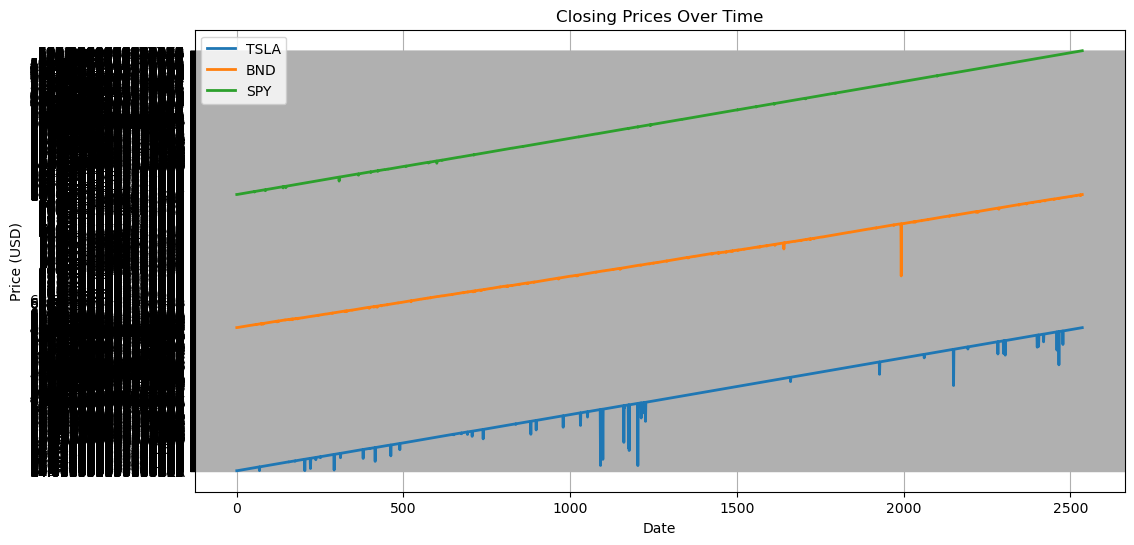

In [11]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df_tsla["Close"], label="TSLA", linewidth=2)
plt.plot(df_bnd["Close"], label="BND", linewidth=2)
plt.plot(df_spy["Close"], label="SPY", linewidth=2)
plt.legend()
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.show()

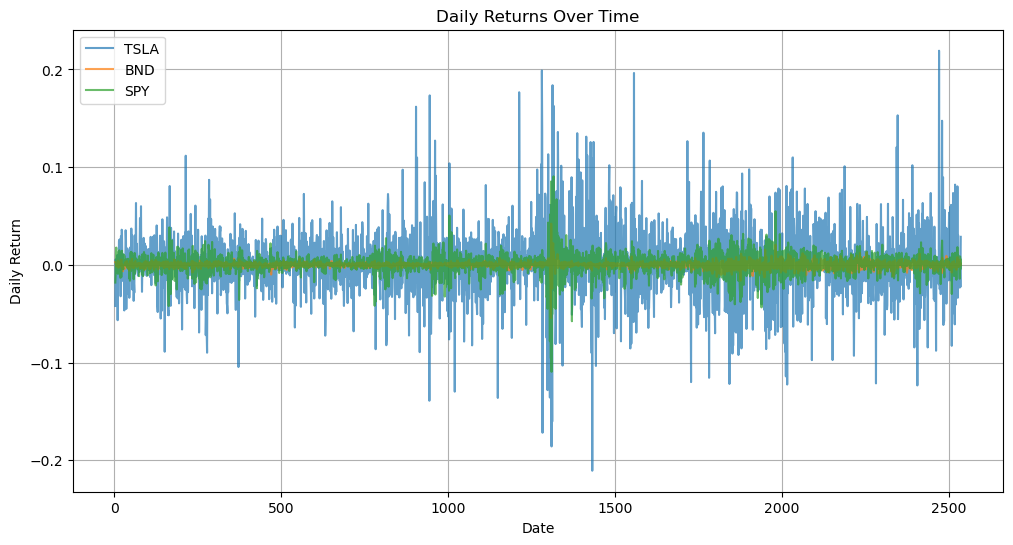

In [12]:
# Ensure 'Close' column is numeric
df_tsla['Close'] = pd.to_numeric(df_tsla['Close'], errors='coerce')
df_bnd['Close'] = pd.to_numeric(df_bnd['Close'], errors='coerce')
df_spy['Close'] = pd.to_numeric(df_spy['Close'], errors='coerce')

# Calculate daily returns
df_tsla["Daily Return"] = df_tsla["Close"].pct_change()
df_bnd["Daily Return"] = df_bnd["Close"].pct_change()
df_spy["Daily Return"] = df_spy["Close"].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df_tsla["Daily Return"], label="TSLA", alpha=0.7)
plt.plot(df_bnd["Daily Return"], label="BND", alpha=0.7)
plt.plot(df_spy["Daily Return"], label="SPY", alpha=0.7)
plt.legend()
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid()
plt.show()

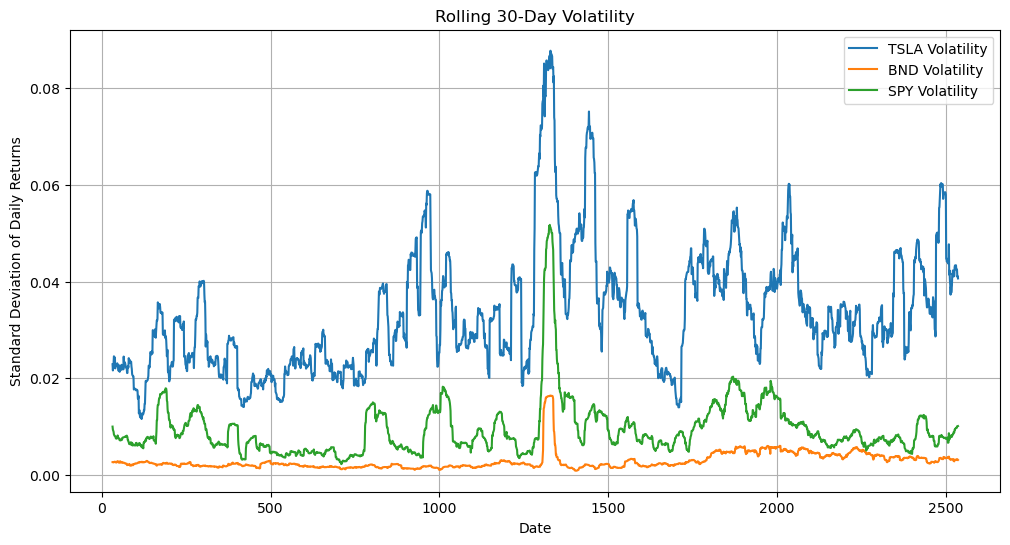

In [13]:
df_tsla["Volatility"] = df_tsla["Daily Return"].rolling(window=30).std()
df_bnd["Volatility"] = df_bnd["Daily Return"].rolling(window=30).std()
df_spy["Volatility"] = df_spy["Daily Return"].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df_tsla["Volatility"], label="TSLA Volatility")
plt.plot(df_bnd["Volatility"], label="BND Volatility")
plt.plot(df_spy["Volatility"], label="SPY Volatility")
plt.legend()
plt.title("Rolling 30-Day Volatility")
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Daily Returns")
plt.grid()
plt.show()


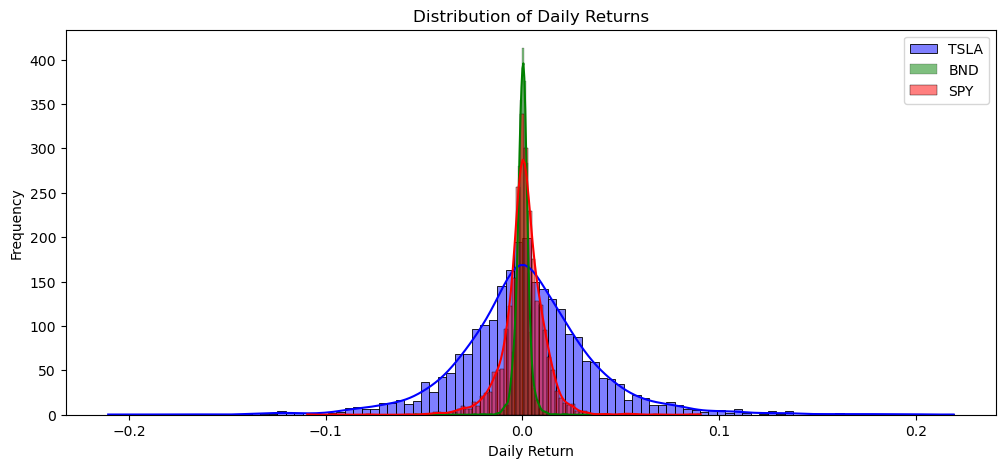

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(df_tsla["Daily Return"], bins=100, kde=True, label="TSLA", color="blue")
sns.histplot(df_bnd["Daily Return"], bins=100, kde=True, label="BND", color="green")
sns.histplot(df_spy["Daily Return"], bins=100, kde=True, label="SPY", color="red")
plt.legend()
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


NaNs in            Price       Close                High                 Low  \
0         Ticker   14.620667                TSLA                TSLA   
1           Date   14.620667                TSLA                TSLA   
2     2015-01-02   14.620667  14.883333206176758   14.21733283996582   
3     2015-01-05   14.006000  14.433333396911621  13.810667037963867   
4     2015-01-06   14.085333  14.279999732971191   13.61400032043457   
...          ...         ...                 ...                 ...   
2532  2025-01-24  406.579987   418.8800048828125   405.7799987792969   
2533  2025-01-27  397.149994  406.69000244140625               389.0   
2534  2025-01-28  398.089996   400.5899963378906               386.5   
2535  2025-01-29  389.100006   398.5899963378906   384.4800109863281   
2536  2025-01-30  400.279999               412.5   384.4100036621094   

                    Open    Volume  Daily Return  Volatility  
0                   TSLA      TSLA           NaN         NaN  
1

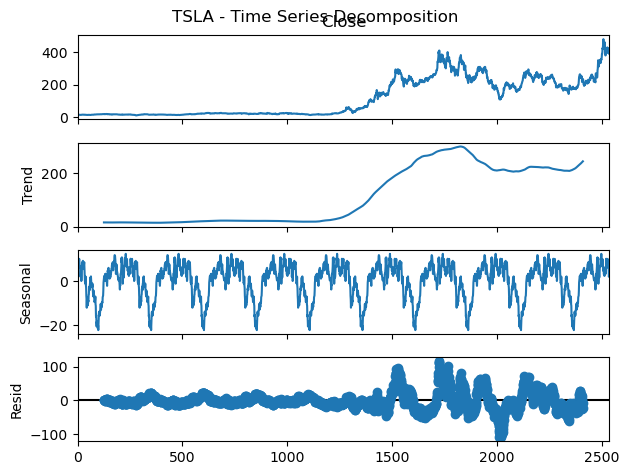

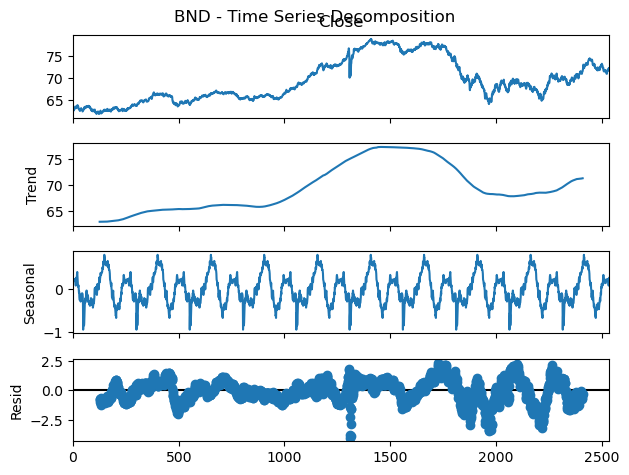

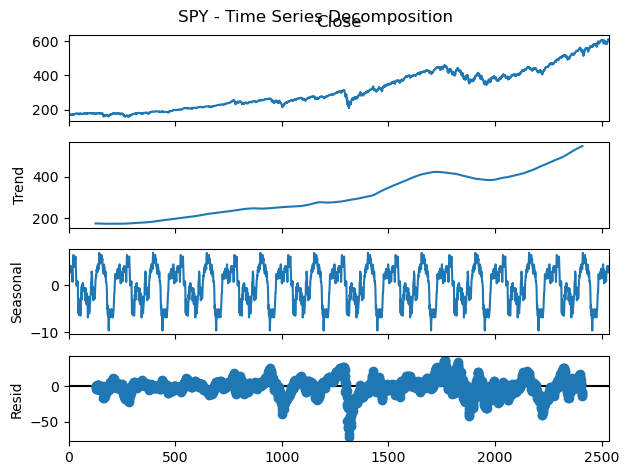

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values using interpolation
df_tsla["Close"] = df_tsla["Close"].interpolate(method='linear', limit_direction='both')
df_bnd["Close"] = df_bnd["Close"].interpolate(method='linear', limit_direction='both')
df_spy["Close"] = df_spy["Close"].interpolate(method='linear', limit_direction='both')

# Replace infinite values with NaN and then fill them
for df in [df_tsla, df_bnd, df_spy]:
    df["Close"] = df["Close"].replace([np.inf, -np.inf], np.nan)
    df["Close"] = df["Close"].fillna(df["Close"].mean())

# Check for remaining NaNs or infinite values
for df in [df_tsla, df_bnd, df_spy]:
    print(f"NaNs in {df}: {df['Close'].isnull().sum()}")
    print(f"Infinite values in {df}: {np.isinf(df['Close']).sum()}")

# Perform decomposition
decomp_tsla = seasonal_decompose(df_tsla["Close"], model="additive", period=252)
decomp_bnd = seasonal_decompose(df_bnd["Close"], model="additive", period=252)
decomp_spy = seasonal_decompose(df_spy["Close"], model="additive", period=252)

# Plot the decomposition results for each stock
for decomp, stock in zip([decomp_tsla, decomp_bnd, decomp_spy], ["TSLA", "BND", "SPY"]):
    decomp.plot()
    plt.suptitle(f"{stock} - Time Series Decomposition")
    plt.show()

